| Adelie penguins                     | Chinstrap penguins                  | Gentoo penguins                     |
| ----------------------------------- | ----------------------------------- | ----------------------------------- |
<img src="Adelie.jpg" width="33%" height="33%"> <img src="Chinstrap.jpg" width="33%" height="33%"> <img src="Gentoo.jpg" width="33%" height="33%">



# Penguin Analysis: Part II
#### Regression models

*Purpose*\
To ascertain if there are certain penguin features that can help predict a penguin’s body mass using regression models. Regression models are a group of statistical techniques that use existing data to estimate the relationships between a single dependent variable and one or more independent variables.  

*Deliverables for Part II* 
   * a. simple linear regression model for which the feature `body_mass_g` is assigned as the continuous dependent variable y (the variable a given model estimates) and `bill_length_mm` as the independent variable X (the explanatory variable or predictor variable). A simple linear regression is appropriate here, because it is a technique that estimates the linear relationship between one independent variable X and one continuous dependent variable y.
   * b. a multiple linear regression model once again assigning the feature `body_mass_g` as the continuous dependent variable, but rather than 1 independent X variable, several all are assessed and several selected. A multiple linear regression is appropriate here, because it estimates the linear relationship between a continuous dependent variable y and one or more independent variables X.

*Data*\
This project uses the Palmer Penguins data set collected and made available by Dr. Kristen Gorman and PalmerStation, Antarctica, LTER. The data is available at: https://allisonhorst.github.io/palmerpenguins. Here it was accessed through the seaborn library. 

*Code*\
All code for this project is located at: https://github.com/izsolnay/Penguins_Python

*Report*\
The report for this project is located at: https://github.com/izsolnay/Penguins_Python

In [1]:
# Import basic packages
import pandas as pd

# Import packages for visualizations
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

# Import regression package
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Import hypothesis testing packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Import data; create df
df0 = pd.read_csv('Penguins_clean.csv')
df0.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Part Ia: Basic EDA

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            335 non-null    object 
 1   island             335 non-null    object 
 2   bill_length_mm     335 non-null    float64
 3   bill_depth_mm      335 non-null    float64
 4   flipper_length_mm  335 non-null    float64
 5   body_mass_g        335 non-null    float64
 6   sex                335 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.4+ KB


In [4]:
print('species')
print(df0['species'].unique())
print('island')
print(df0['island'].unique())
print('sex')
print(df0['sex'].unique())

species
['Adelie' 'Chinstrap' 'Gentoo']
island
['Torgersen' 'Biscoe' 'Dream']
sex
['Male' 'Female']


In [5]:
# Check for missing values
df0.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Results    
The df has 335 observations and 7 variables:
* 3 *object*: `species`, `island`, and `sex`
  * `species`: Adelie, Chinstrap, Gentoo
  * `island`: Biscoe, Dream, Torgersen
  * `sex`: Female, Male   
    
* 4 *continuous float*: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`

In [6]:
# Check for duplicates
duplicates = df0[df0.duplicated(keep=False)]
duplicates

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [7]:
# Drop duplicates
df0.drop_duplicates().shape

(335, 7)

### Get basic statistics
* Create general visual plots

In [8]:
df0.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.856418,17.132239,200.937313,4200.895522
std,5.312037,1.977896,13.981348,800.962616
min,32.100000,13.100000,172.000000,2700.000000
25%,39.250000,15.500000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.450000,18.700000,213.000000,4750.000000
max,55.900000,21.500000,231.000000,6300.000000


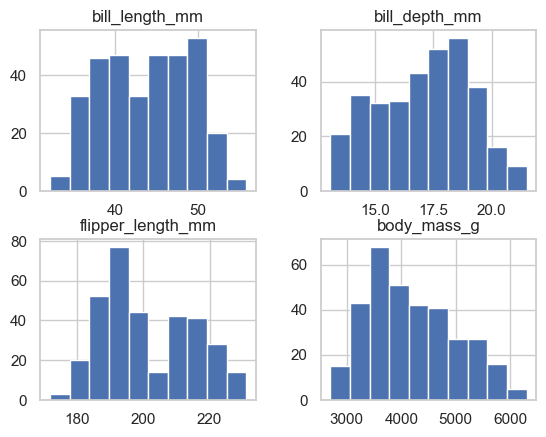

In [9]:
# Visualize distributions
df0.hist();

## Part IIb: Build a simple linear regression model

### Prepare data for modelling simple linear regression
* transform variable: species
  * Adelie and Gentoo penguins because they have the greatest representation in the df
  * remove Chinstrap penguin data because the far smaller data set could throw off the model
* check assumptions for linear regression: linearity, normality, independent observations, & homoscedasticity 
* subset data for modelling

In [10]:
# Create new df with only Adelie and Gentoo penguins
df_AG = df0[df0['species'] != 'Chinstrap'].dropna()
df_AG.reset_index(inplace=True, drop=True)
df_AG.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [11]:
df_AG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            269 non-null    object 
 1   island             269 non-null    object 
 2   bill_length_mm     269 non-null    float64
 3   bill_depth_mm      269 non-null    float64
 4   flipper_length_mm  269 non-null    float64
 5   body_mass_g        269 non-null    float64
 6   sex                269 non-null    object 
dtypes: float64(4), object(3)
memory usage: 14.8+ KB


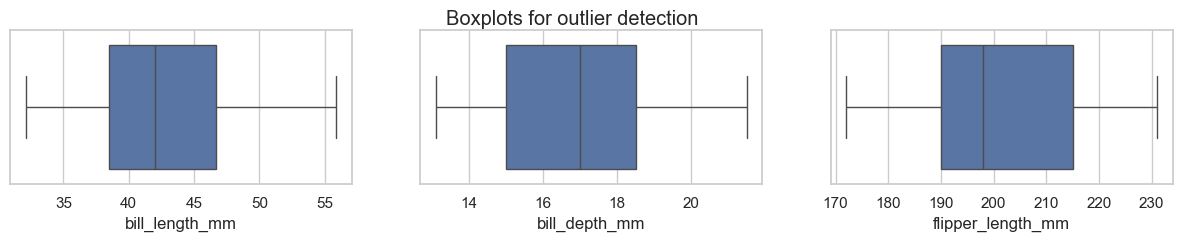

In [12]:
# Create boxplots to check for outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df_AG['bill_length_mm'])
sns.boxplot(ax=axes[1], x=df_AG['bill_depth_mm'])
sns.boxplot(ax=axes[2], x=df_AG['flipper_length_mm'])
plt.show();

Results\
No worrisome outliers present as demonstrated above and in the EDA

### Check assumptions
  * LINEARITY: check that each predictor variable (X) is linearly related to the outcome variable (y = `body_mass_g`)
  * NORMALITY: check that residuals are normally distributed
    * check after model is made
  * INDEPENDENT OBSERVATIONS: each observation in the dataset is independent
    * Since each row has data on a different penguin, there is no reason to think a penguin's bill length or body mass is related to any other penguin 
  * HOMOSCEDASTICITY: check that the variance of the residuals is constant or similar across the model
    * check after model is made

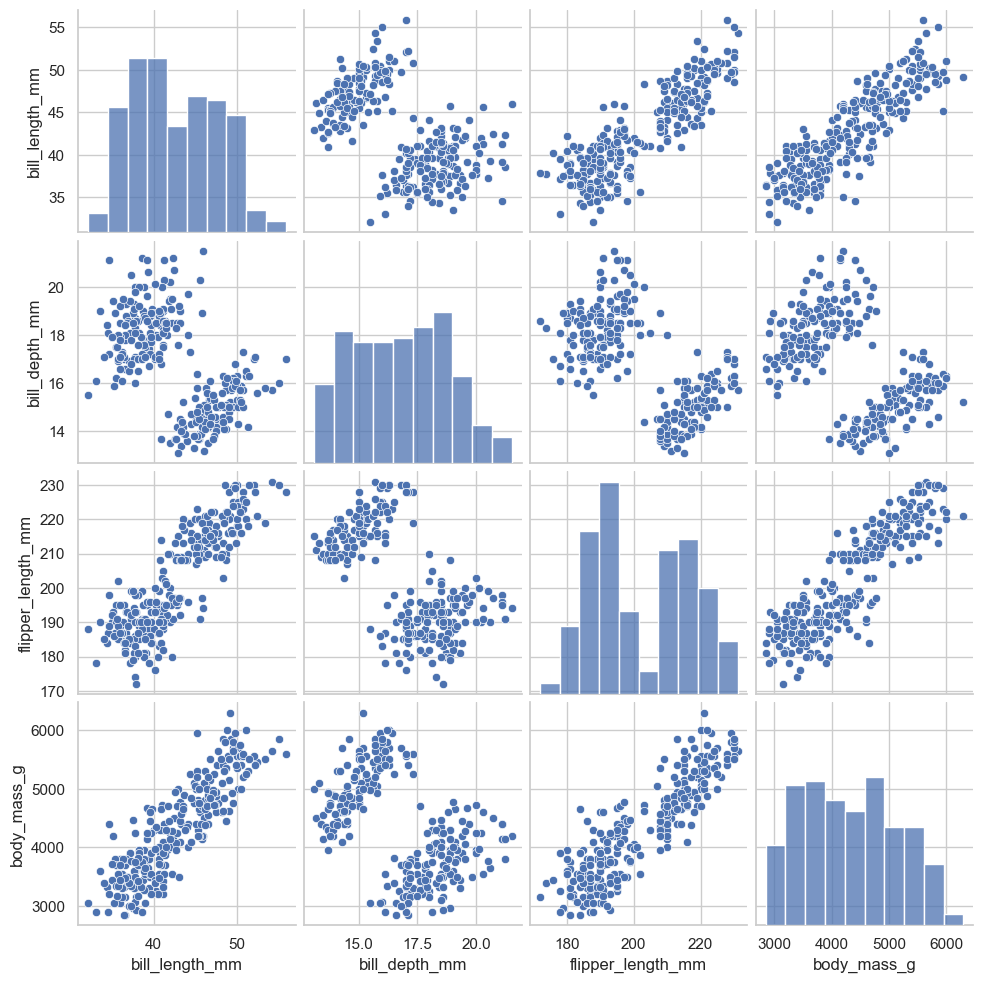

In [13]:
# Create pairwise scatterplots to visualize more than 1 relationship at the same time to check for collinearity & check linearity assumption
sns.pairplot(df_AG);

Results    
Linear relationships between:   
* `bill_length_mm` and `body_mass_g` are positively correlated
* `bill_length_mm` and `flipper_length_mm` are positively correlated
* `body_mass_g` and `flipper_length_mm` are positively correlated

Also,
`bill_length_mm` has a mostly normal distribution and will probably result in normally distributed residuals
and `body_mass_g` now has a mostly normal distribution and will probably result in normally distributed residuals.

In [14]:
# Subset OLS (ordinary least squares) data for modelling
ols_data = df_AG[['bill_length_mm', 'body_mass_g']] # [] signify desired variables
ols_data.head()

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
3,36.7,3450.0
4,39.3,3650.0


### Build simple linear regression model
* construct & write out formula
* build model

In [15]:
# Create an OLS object 
# For linear regression y comes before ~, and x(s) comes after
ols_formula = 'body_mass_g ~ bill_length_mm'

In [16]:
# Build simple linear regression model
OLS = ols(formula = ols_formula, data = ols_data) # ols_formula is the formula argument of the OLS function (above)
                                                    # data = ols_data, the data argument (subset above)

# Fit model
penguin_model = OLS.fit()
print(penguin_model)

In [17]:
# Get summary
penguin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.96e-86
Time:                        10:41:33   Log-Likelihood:                -1994.5
No. Observations:                 269   AIC:                             3993.
Df Residuals:                     267   BIC:                             4000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1793.4815    207.565     -8.641      0.000   -2202.155   -1384.808
bill_length_mm   143.1081      4.827     29.645      0.000     133.604     152.613
==============================================================================
Omnibus:                        2.646   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.674
Skew:                           0.238   Prob(JB):                        0.263
Kurtosis:                       2.893   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results of model   
The model predicted 2 coefficients:
* **intercept** ($β_0$) = -1793.4815
* **slope** ($β_1$) = 143.1081

The slope ($β_1$) is the amount y (the dependent variable `body_mass_g`) increases or decreases per 1 unit increase of X (the independent variable `bill_length_mm`).      
The intercept ($β_0$) is the value of y, when X = 0.

The coefficients indicate that there is a positive correlation between bill length and body mass (this is also seen in the pairplot above) with the best fit line having an intercept of -1793.4815 and a slope of 143.1081 (as seen below in the best-fit line).

The model estimates that a penguin with 1 mm longer bill length will have 141.grams higher body mass.
* y = $β_0$ + ($β_1$ * X)
* `body_mass_g` = -1793.4815 ($β_0$) + 143.1081 ($β_1$) * `bill_length_mm`

The corresponding **P-value** assess statistical significance. The P-value conveys the probability that that the null hypothesis is not false.
 * $H_0$ (NULL): $β_1$ = 0 (slope does not indicate high correlation) = CHANCE
 * $H_1$(*alternative*): $β_0$ ≠ 0 (slope does indicate correlation) = not chance
   
If a P-value is small (< 0.05), as it is here, the NULL hypothesis is likely false (not chance), meaning that there is a correlation between bill length and body mass; thus, we can reject the NULL hypothesis. 
We can then further state that there is a 95% chance that the interval 133.604 to 152.613 contains the true parameter value of the estimated slope (143.1081).    

The confidence band (visualized below around the best-fit line) reveals the confidence interval (133.604, 152.613) for each point on a regression line.  

#### Results of $R^2$ (R-squared, the coefficient of determination)
$R^2$ measures the variation percentage in the dependent variable y that is explained by the independent X variable(s)\
An $R^2$ of
* 0 = the independent predictors variables (X(s)) do not explain the dependent predicted variable (y)
* 1 = the independent predictors variables (X(s)) do explain the dependent predicted variable (y)

The **$R^2$** for this model is 0.767, which means that ~77% of body mass can be explained by (correlated to) a variance in bill length between penguins\
23% of that variance is left unexplained

A high $R^2$ can be misleading, because it does not consider what each variable contributes; thus, the model can become very specific to the data it was built on. It can overfit the data and likely would not perform well on new data. It is said to have a high variance.\
Also, with every added X, $R^2$ will increase.  

A low $R^2$ means that the model failed to capture the underlying pattern in the outcome variable. It underfit and is said to have a high bias.

Thus, adjusted $R^2$ is important when encountering a high $R^2$. 0.767 is not an overly high $R^2$.

#### Results of adjusted $R^2$
Adjusted $R^2$ is a more specific measurement than simple $R^2$ because it adjusts with every added variable and penalizes unnecessary explanatory variables.\
An adjusted $R^2$ of
* 0 = the independent predictors variables (X(s)) do not explain the dependent predicted variable (y)
* 1 = the independent predictors variables (X(s)) do explain the dependent predicted variable (y)

The adjusted $R^2$ for this model is also 0.766, thus the model is very good at explaining the variance in body mass and supports the ~77% $R^2$.

### Conclusion
* On average a penguin of either the Gentoo or Adelie penguin species, regardless of sex, with 1 mm longer bill length is expected to have 143 grams higher body mass
* ~77% of this body mass is explained by bill length
* ~23% of the Gentoo or Adelie penguin species body mass must be explained by other factors
* Clearly a multiple linear regression model is needed to take other factors into account in more definitively predicting body mass and include Chinstrap penguins

#### Check final assumptions for simple linear regression: NORMALITY and HOMOSCEDASTICITY
Residuals are used to estimate errors.\
These assumptions focus on the distribution of residuals. These are the difference between the actual and fitted/predicted values using the model's resid attribute. (That portion not attributable.)

* The sum of residuals is always 1
* OLS minimizes the number of squared residuals

##### LINEARITY assumption
* Create reg plot
* Check that all points  appear to fall along a straight line.
   * This indicates that each predictor variable X (`bill_length_mm`) is linearly related to  outcome variable y(`body_mass_g`).

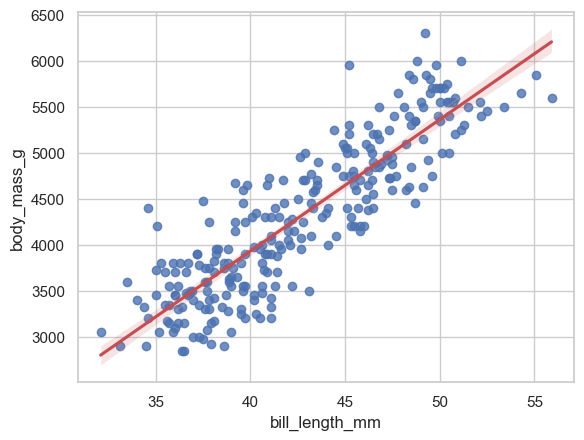

In [18]:
# Plot the data with the best-fit regression line
sns.regplot(x = 'bill_length_mm', y = 'body_mass_g', data = ols_data, line_kws={"color": "r"});

##### NORMALITY assumption
* create histogram of residuals
* create Q-Q plot of residuals

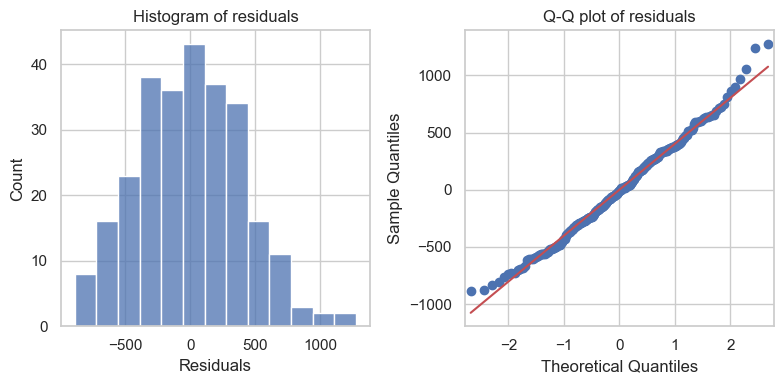

In [19]:
# Check normality assumption with a histogram and Q-Q plot
# Calculate residuals and save to new variable
residuals = penguin_model.resid

# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram of residuals')

# Create Q-Q plot with the residuals
sm.qqplot(residuals, line='s',ax = axes[1]) 
axes[1].set_title('Q-Q plot of residuals')

plt.tight_layout() 
plt.show()

#### Results
In the histogram, the residuals are normally distributed (almost a classic bell curve if slightly skewed). 

In the Q-Q plot, the residuals are again mostly normally distributed, since there is mostly a straight diagonal line going from the bottom left to the upper right.    
There is some slight curvature on the extremes. 

Normality assumption has been met.

##### HOMOSCEDASTICITY and INDEPENDENCE assumptions
* create a scatterplot of the fitted values and residuals

In [20]:
# Subset X variable bill_length_mm
X = ols_data['bill_length_mm'] 

# Get predictions from model and save to new variable
fitted_values = penguin_model.predict(X)

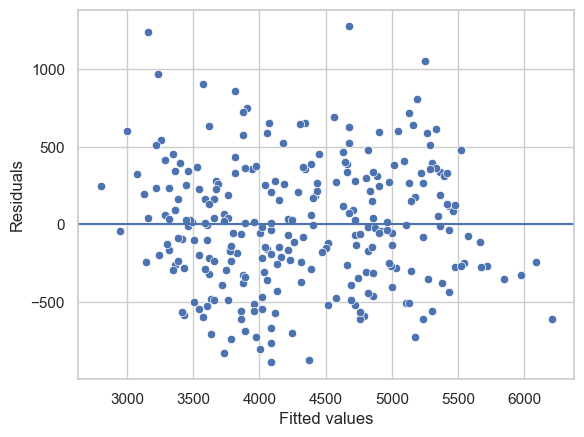

In [21]:
# Create a scatter plot of the fitted values against the residuals (distance from the best line)
fig = sns.scatterplot(x = fitted_values, y = residuals)

# Set x-axis and y-axis labels
fig.set_xlabel('Fitted values')
fig.set_ylabel('Residuals')

fig.axhline(0) # adds a reference line at residuals = 0

plt.show();

#### Results   
A random-looking scatter plot is indicative that the INDEPENDENCE assumption is not violated. That this looks like a cloud confirms HOMOSCEDASTICITY.

## Part IIc: Build multiple linear regression model

### Prepare data for modelling for multiple linear regression¶
* select features
  * check for correlations between y variable and X variables
* subset data  

In [22]:
df0.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [23]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            335 non-null    object 
 1   island             335 non-null    object 
 2   bill_length_mm     335 non-null    float64
 3   bill_depth_mm      335 non-null    float64
 4   flipper_length_mm  335 non-null    float64
 5   body_mass_g        335 non-null    float64
 6   sex                335 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.4+ KB


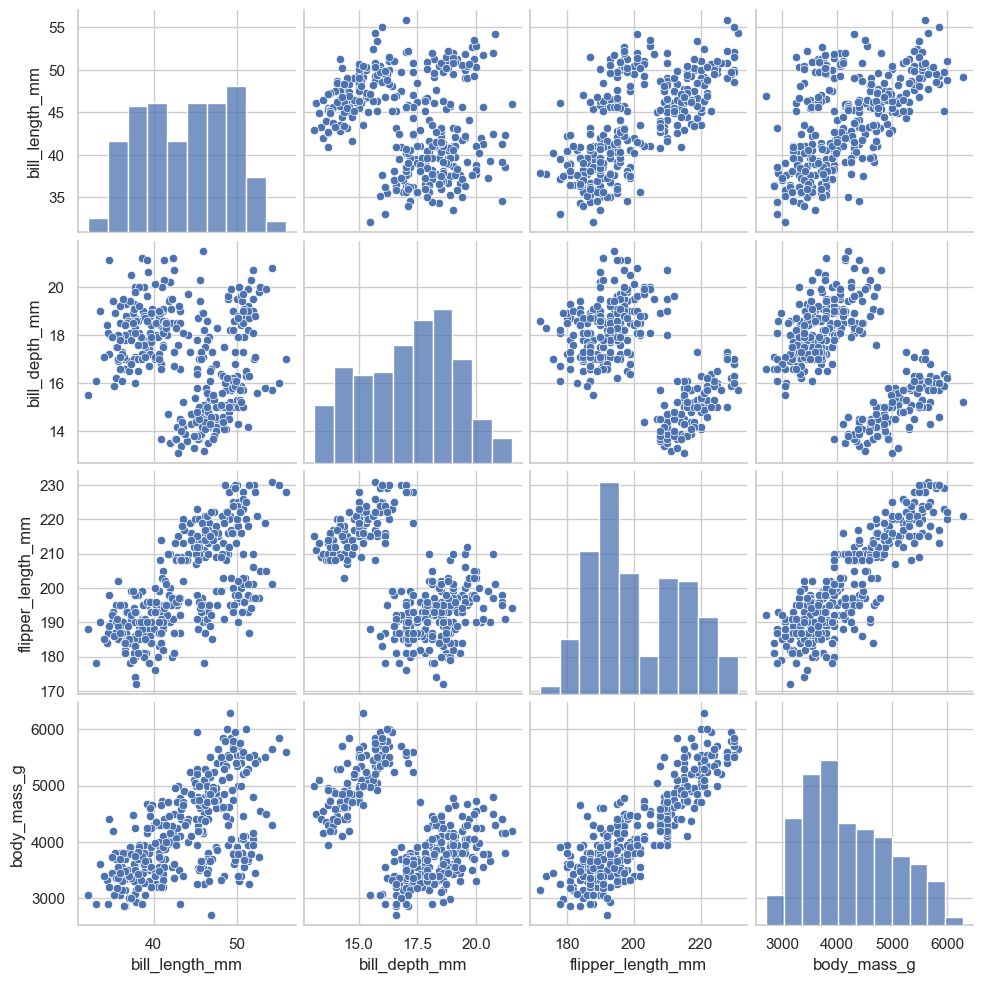

In [24]:
# Visually check for correlations between y variable and X variables to decide which to keep and which to remove
sns.pairplot(df0);

Results    
For a multiple linear regression, no 2 independent variables can be highly correlated with each other (they cannot be linearly related to each other).    
Linear relationships between:   
* `bill_length_mm` and `body_mass_g` are positively correlated
* `bill_length_mm` and `flipper_length_mm` are positively correlated
* `body_mass_g` and `flipper_length_mm` are positively correlated

In order to avoid multicollinearity, drop `flipper_length_mm` as X variable because positively correlated with both `bill_length_mm` and `body_mass_g`. Isolate out `bill_length_mm` as continuous variable X.

* Remove `bill_depth_mm`, because it is not linear. From the EDA it is known that Gentoos, the penguins with the largest body mass, have some of the shortest bill depth.   

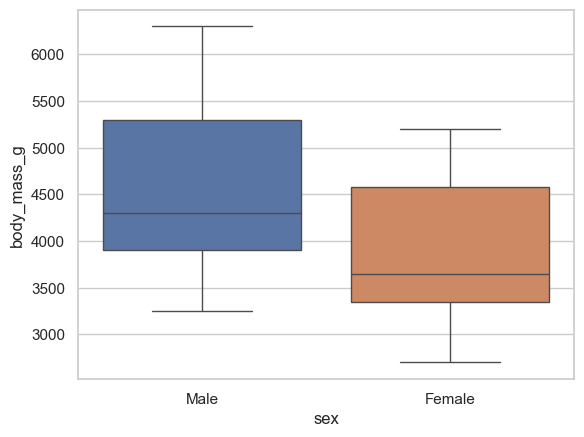

In [25]:
# Create a boxplot with sex and body mass
sns.boxplot(x = 'sex', y = 'body_mass_g', data = df0, hue = 'sex');

In [26]:
# Calculate avg body mass
avg_weight_by_sex = df0.groupby('sex')['body_mass_g'].mean()
avg_weight_by_sex

sex
Female    3865.625000
Male      4538.173653
Name: body_mass_g, dtype: float64

In [27]:
# Convert body mass to kilograms
avg_weight_by_sex = df0.groupby('sex')['body_mass_g'].mean().apply(lambda x: x / 100)
avg_weight_by_sex

sex
Female    38.656250
Male      45.381737
Name: body_mass_g, dtype: float64

In [28]:
# Subset data to include 'body_mass_g', 'bill_length_mm', 'sex', 'species'
# Drop NAs
df_MLR = df0[['body_mass_g', 'bill_length_mm', 'sex', 'species']].dropna()
df_MLR.reset_index(inplace=True, drop=True)

In [29]:
df_MLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   body_mass_g     335 non-null    float64
 1   bill_length_mm  335 non-null    float64
 2   sex             335 non-null    object 
 3   species         335 non-null    object 
dtypes: float64(2), object(2)
memory usage: 10.6+ KB


In [30]:
# Subset the data into independent Xs and dependent y
X = df_MLR[['bill_length_mm', 'sex', 'species']]
y = df_MLR[['body_mass_g']]
print(X.info())
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_length_mm  335 non-null    float64
 1   sex             335 non-null    object 
 2   species         335 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   body_mass_g  335 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


Data set   
X contains:
* 1 continuous X variable, `bill_length_mm`
* 2 categorical variables, `sex` and `species`

y contains:
* 1 continuous y variable, `body_mass_g`

In [31]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # Test size = proportion (%) to hold out

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(234, 3)
(101, 3)
(234, 1)
(101, 1)


### Build model
* write out OLS formula
* fit model

In [33]:
# Write out OLS formula 
ols_formula = 'body_mass_g ~ bill_length_mm + C(sex) + C(species)'
     # C() indicates categorical variable so OLS will one-hot code variables automatically

In [34]:
# Create OLS df
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object
OLS = ols(formula = ols_formula, data = ols_data)

# Fit the model
pMLR_model = OLS.fit()

In [35]:
# Get model results
pMLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     306.2
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.20e-90
Time:                        10:41:36   Log-Likelihood:                -1671.9
No. Observations:                 234   AIC:                             3354.
Df Residuals:                     229   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2146.4432    353.867      6.066      0.000    1449.191    2843.696
C(sex)[T.Male]            514.9669     51.953      9.912      0.000     412.600     617.334
C(species)[T.Chinstrap]  -260.4691    110.723     -2.352      0.019    -478.635     -42.303
C(species)[T.Gentoo]     1089.6412     95.797     11.374      0.000     900.885    1278.397
bill_length_mm             33.0741      9.536      3.468      0.001      14.285      51.863
==============================================================================
Omnibus:                        0.144   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.285
Skew:                          -0.013   Prob(JB):                        0.867
Kurtosis:                       2.831   Cond. No.                         824.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check assumptions

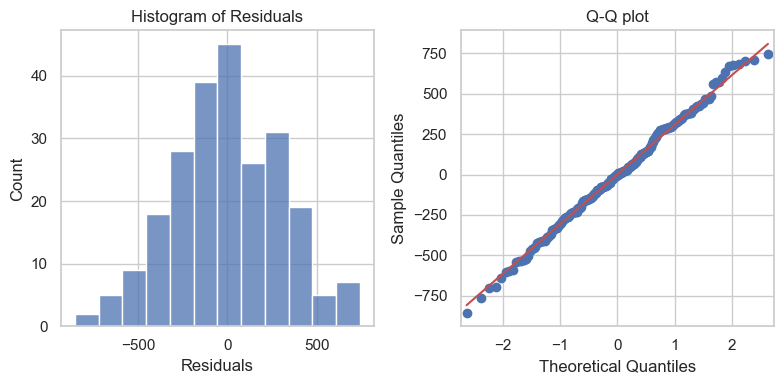

In [36]:
# Verify normality assumption with a histogram and Q-Q plot
residuals = pMLR_model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Plot histogram of residuals
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram of Residuals')

# Create Q-Q plot
sm.qqplot(residuals, line='s',ax = axes[1]) 
axes[1].set_title('Q-Q plot')
plt.tight_layout() 
plt.show();

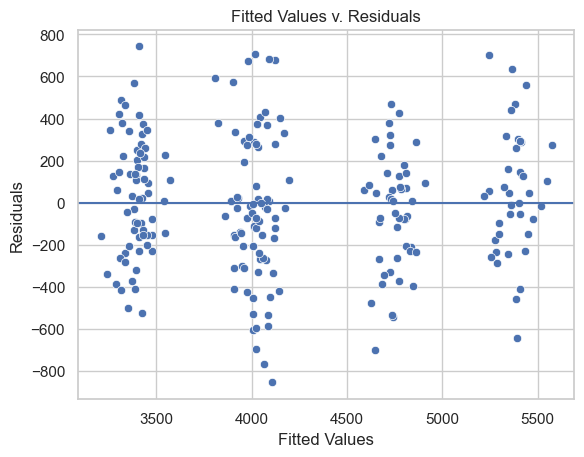

In [37]:
# Create a scatter plot with the fitted values from the model and the residuals
fig = sns.scatterplot(x = pMLR_model.fittedvalues, y = pMLR_model.resid)

fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')

fig.set_title('Fitted Values v. Residuals')
fig.axhline(0)

plt.show();

#### Results
In the histogram, the residuals are normally distributed (almost a classic bell curve).

In the Q-Q plot, the residuals are again normally distributed, since there is a straight diagonal line going from the bottom left to the upper right. NORMALITY assumption has been met.

A random-looking scatter plot is indicative that the INDEPENDENCE assumption is not violated. That this looks like a cloud confirms HOMOSCEDASTICITY.

In [38]:
# Get model results
pMLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     306.2
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.20e-90
Time:                        10:41:37   Log-Likelihood:                -1671.9
No. Observations:                 234   AIC:                             3354.
Df Residuals:                     229   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2146.4432    353.867      6.066      0.000    1449.191    2843.696
C(sex)[T.Male]            514.9669     51.953      9.912      0.000     412.600     617.334
C(species)[T.Chinstrap]  -260.4691    110.723     -2.352      0.019    -478.635     -42.303
C(species)[T.Gentoo]     1089.6412     95.797     11.374      0.000     900.885    1278.397
bill_length_mm             33.0741      9.536      3.468      0.001      14.285      51.863
==============================================================================
Omnibus:                        0.144   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.285
Skew:                          -0.013   Prob(JB):                        0.867
Kurtosis:                       2.831   Cond. No.                         824.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Results of coefficients
Each coefficient indicates change in y = body mass (grams)

`sex` variable encoded:
 * 0 = f, meaning that the baseline or reference point is female penguins
 * 1 = m

`C(sex)[T.Male]`, coefficient *514.96*   
  * a male penguin's body mass is predicated to be ~515g greater than a female penguin
  * with a statistically significant p-value (0.000) and a 95% chance of the interval [412.60, 617.33] containing the true parameter value of the slope (~515g increase in body mass)

`species` variable encoded:
 * 0 = Adelie, meaning that the baseline or reference point is Adelie penguins
 * 1 = Chinstrap
 * 2 = Gentoo

`C(species)[T.Chinstrap]`, coefficient *-260.46* 
 * the Chinstrap penguin's body mass is predicated to be about *260 grams* less than an Adelie's
 * with a statistically significant p-value (0.019) and a 95% confidence interval of [-478.64, -42.30]


`C(species)[T.Gentoo]`, coefficient *1089.64* 
 * the Gentoo penguin's body mass is predicated to be about *1089.64g* greater than an Adelie's
 * with a statistically significant p-value (0.000) and a 95% confidence interval of [900.89, 1278.40]

`bill_length_mm`, coefficient *33.07* 	
* for each 1mm increase in bill length, a penguin is predicated to be *~33g* longer
 * with a statistically significant p-value (0.001) and a 95% confidence interval of [14.29, 51.86]

#### Results of $R^2$ and adjusted $R^2$
* The $R^2$ for this model is 0.842, thus the model explains 84% of the variance in body mass with only 16% left unexplained.
* The adjusted $R^2$ for this model is 0.840, thus the model is very good at explaining the variance in body mass and supports the 84% $R^2$.

#### Calculate VIF (variance inflation factor)

In [39]:
# Subset continous independent variables 
X = ols_data[['body_mass_g', 'bill_length_mm']]

# Calculate VIF for each variable
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Create iterative for loop

# Create df with VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])  # Creare df of VIF

# Display the VIF results.
df_vif

,VIF
body_mass_g,46.435483
bill_length_mm,46.435483


#### Results of VIF
The **VIF** (variance inflation factor) quantifies how correlated each independent variable (X) is with all the other independent variables (Xs). Or, how much the variance of each variable is *inflated* due to correlation with other X variables. A model with high variance can overfit to the observed data and generate inaccurate estimates for unseen data. The larger the VIF, the more multicollinearity there is in the model.

A VIF of 1 indicates 0 correlation between the X variable in question and the other predictor variables in the model.    
Both variables, `body_mass_g` and `bill_length_mm`, have very high VIF and indicate multicollinearity.   

Since the VIF and simple $R^2$ are high, next steps might be to perform either:
* Forward selection is a stepwise variable selection process
* Backward elimination is a stepwise variable selection process
* Lasso regression
* Ridge regression
* Elastic-net regression

However, multicollinearity is expected, since it is reasonable to assume, for example, the larger a penguin's body mass, the larger it's bill length would be expected to be.  

### Perfom hypothetical tests for statistical significance

#### Perform a two-way ANOVA test
ANOVA assesses the significance of the effects of each independent variable *and* any interaction effects between the variables.

Here, ANOVA is performed to determine whether there is a statistically significant difference in the means of body mass (y) between groups (Xs).
* The groups (Xs) are species (Adelie, Chinstrap, and Gentoo), sex (f/m), and the continuous feature, bill_length_mm. 

`species`
* NULL hypothesis states that the *means* of each group are =. There is no difference in body mass based on species = CHANCE
  * $H_0$: µAdelie = µChinstrap = µGentoo
* *Alternative* hypothesis states that the means of each group are not =. There is a difference in body mass based on species
  * $H_1$: µAdelie ≠ µChinstrap ≠ µGentoo

`sex` 
* NULL hypothesis states that the *means* of each group are =. There is no difference in body mass based on sex = CHANCE
  * $H_0$: µfemale = µmale
* *Alternative* hypothesis states that the means of each group are not =. There is a difference in body mass based on sex
  * $H_1$: µfemale ≠ µmale


In [40]:
# Create an two-way ANOVA table for the fit model
# Save results to variable
anova_results = sm.stats.anova_lm(pMLR_model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(sex),9.447858e+06,1.0,98.251395,1.681792e-19
C(species),6.555445e+07,2.0,340.861182,2.246289e-69
bill_length_mm,1.156808e+06,1.0,12.030030,6.252599e-04
Residual,2.202065e+07,229.0,NaN,NaN


#### Results
*P-values* are all miniscule. All predictors have an effect on penguin body mass, effects are not due to chance.

*F-test statistic*     
The F-test compares the variability between group means (the effect of the Xs) to the variability within each group (residual variability). 

The high F-test statistic, 98.25, suggests that the variability *between* the sex group means is larger than the variability *within* each group. This large difference in variability indicates that at least 1 of the predictors in the model has a significant effect on the dependent variable.

The high F-test statistic, 340.86, suggests that the variability *between* the species group means is much larger than the variability *within* each group. This large difference in variability indicates that at least 1 of the predictors in the model has a significant effect on the dependent variable.

#### Perform an ANOVA post hoc tests

In [41]:
tukey_oneway = pairwise_tukeyhsd(endog = df_MLR['body_mass_g'], groups = df_MLR['species'], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Adelie,Chinstrap,28.7009,0.908,-132.7696,190.1713,False
Adelie,Gentoo,1368.7835,0.0,1235.0804,1502.4866,True
Chinstrap,Gentoo,1340.0826,0.0,1173.1485,1507.0168,True


#### Results
**Test 1: Adelie vs Chinstrap**

$H_0: species_A = species_C$

The body mass of Adelie and Chinstrap are the same

$H_1: species_A \neq species_C$

The body mass of Adelie and Chinstrap are not the same

Result: fail to reject the null hypothesis that the body mass of Adelie vs Chinstrap are the same


**Test 2: Adelie vs Gentoo**

$H_0: species_A=species_G$

The body mass of Adelie and Gentoo are the same

$H_1: species_A \neq species_G$

The body mass of Adelie and Gentoo are not the same

Result: can reject the null hypothesis that the body mass of Adelie and Gentoo are the same


**Test 3: Chinstrap vs Gentoo**

$H_0: species_C=species_G$

The body mass of Chinstrap and Gentoo are the same

$H_1: species_C \neq species_G$

The body mass of Chinstrap and Gentoo are not the same

Result: can reject the null hypothesis that the body mass of Chinstrap and Gentoo are the same

In [42]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = df_MLR['body_mass_g'], groups = df_MLR['sex'], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Female,Male,672.5487,0.0,516.1051,828.9922,True


#### Results
**Test 1: Adelie vs Chinstrap**

$H_0: sex_F = sex_M$

The body mass of females and males are the same

$H_1: sex_F \neq sex_M$

The body mass of females and males are not the same

Result: can reject the null hypothesis that the body mass of females and males are the same

In [43]:
# Perform the Tukey's HSD post hoc test on multiple groups
# Combine 'col2' and 'col3' into a single column 'combined_col' for grouping
df_MLR['combined_col'] = df_MLR['species'].astype(str) + '_' + df_MLR['sex'].astype(str)

tukey_oneway = pairwise_tukeyhsd(endog = df_MLR['body_mass_g'], groups=df_MLR['combined_col'], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Adelie_Female,Adelie_Male,690.8784,0.0,545.7907,835.966,True
Adelie_Female,Chinstrap_Female,166.5643,0.1039,-18.1712,351.2998,False
Adelie_Female,Chinstrap_Male,581.7158,0.0,396.9803,766.4513,True
Adelie_Female,Gentoo_Female,1315.0864,0.0,1162.4643,1467.7085,True
Adelie_Female,Gentoo_Male,2120.0113,0.0,1966.6936,2273.3289,True
Adelie_Male,Chinstrap_Female,-524.3141,0.0,-709.0496,-339.5786,True
Adelie_Male,Chinstrap_Male,-109.1626,0.5368,-293.8981,75.5729,False
Adelie_Male,Gentoo_Female,624.208,0.0,471.5859,776.8301,True
Adelie_Male,Gentoo_Male,1429.1329,0.0,1275.8152,1582.4506,True
Chinstrap_Female,Chinstrap_Male,415.1515,0.0,197.8867,632.4163,True


#### Results
**Test 2: Adelie_Female vs Chinstrap_Female**

$H_0: Adelie_F = Chinstrap_F$

The body mass of Adelie_Female and Chinstrap_Female are the same

$H_1: Adelie_F \neq Chinstrap_F$

The body mass of Adelie_Female and Chinstrap_Female are not the same

Result: fail to reject the null hypothesis that the body mass of Adelie_Female and Chinstrap_Female are the same
*Female Adelies and female Chinstraps have similar body masses*


**Test 7: Adelie vs Gentoo**

$H_0: Adelie_M = Chinstrap_M$

The body mass of Adelie_Male and Chinstrap_Male are the same

$H_1: Adelie_M \neq Chinstrap_M$

The body mass of Adelie_Male and Chinstrap_Male are not the same

Result: fail to reject the null hypothesis that the body mass of Adelie_Male and Chinstrap_Male are the same
*Male Adelies and Male Chinstraps have similar body masses*

All other comparisons can be rejected.

### Evaluate model on test data
* use Mean Squared Error
* visualize results with a scatter plot

In [44]:
# Make predictions on the test set
y_pred = pMLR_model.predict(X_test)
print(y_pred)

25     3399.950823
109    3459.484167
76     4053.828838
196    3533.063240
57     3327.187847
          ...     
15     3284.191542
6      3957.914005
231    5378.295958
210    3324.696535
93     3406.565639
Length: 101, dtype: float64


In [45]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 94264.35328907562


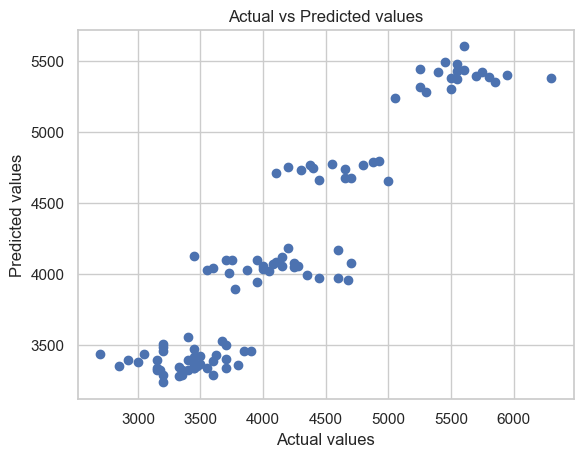

In [46]:
# Plot predicted values vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

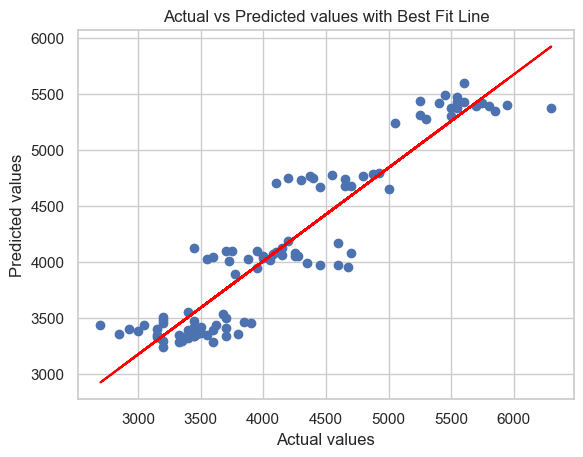

In [47]:
# Replot with best fit line
# Import numpy
import numpy as np

# Reshape the arrays to 1D vectors to make sure that the input data is compatible with the polyfit function
y_test_1d = np.array(y_test).reshape(-1)
y_pred_1d = np.array(y_pred).reshape(-1)

# Fit a linear regression line to the actual and predicted values
m, b = np.polyfit(y_test_1d, y_pred_1d, 1)

plt.scatter(y_test_1d, y_pred_1d)
plt.plot(y_test_1d, m*y_test_1d + b, color='red')  # Plot the best fit line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values with Best Fit Line')
plt.show()


#### Results     
MSE is the average of the squared difference between the predicted and actual values.

*Normally*
* Perfect Prediction: if all points fall on a diagonal line from the bottom left to the top right, it indicates a perfect prediction where the model's predicted values match the actual values exactly.

* Overestimation: points above the diagonal line suggest that the model tends to overestimate the target variable compared to the actual values.
  
* Underestimation: points below the diagonal line indicate that the model tends to underestimate the target variable compared to the actual values.

* Spread of Points: the spread of points around the diagonal line indicates the variability in the model's predictions. A tighter cluster of points around the diagonal line suggests more accurate predictions, while a wider spread indicates higher errors.

*Here*  
From the scatter plot, it can be observed that the model both under estimated and overestimated body mass and the spread of the points demonstrates this inconsistency. 

The four distinct clusters around the best fit line, likely indicate different patterns in the model's predictions. These clusters could indicate:

* Consistent Predictions: if each cluster represents a group of points that are tightly packed around the diagonal line, it suggests that the model is making consistent and accurate predictions for those specific groups.

* Varying Prediction Accuracy: the four clusters could imply that some clusters may have more accurate predictions (closer to the diagonal line), while others may have higher errors (further from the line).
  
* Heterogeneous Data: the presence of multiple clusters could indicate that the dataset contains diverse patterns or relationships that the model is capturing differently. Refinement of the model may better capture the nuances within each cluster.
